In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
from IPython.display import HTML



from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

import matplotlib.dates as mda

import string

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ishio\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# 1. Data Cleaning

In [2]:
# # Reading the data
# data = pd.read_csv('data/speed_dating.csv', encoding='ISO-8859-1')
# data.shape

In [3]:
# data.head()

In [4]:
# pd.set_option('display.max_rows', None)

In [5]:
# obj_cols = data.select_dtypes(include='object').columns
# print(obj_cols)

In [6]:
# #Filling field column, we have field_cd column that keeps numeric version of it.
# #We will assign the empty ones 18 - Other and drop Field column

# data['field_cd'].fillna(18, inplace=True)
# data.drop('field', inplace=True, axis=1)
# data['undergra'].fillna('other', inplace=True)

In [7]:
# def preprocess_text(text):
#     stop_words = set(stopwords.words('english'))
#     lemmatiser = WordNetLemmatizer()
#     regex_rule = r'[^\w\s]'
    
    
#     text = re.sub(regex_rule, " ", text)
#     tokens = word_tokenize(text)

#     filtered_sentence = []
#     for w in tokens:
#         if w not in stop_words:
#             filtered_sentence.append(w)

#     lemmas = [lemmatiser.lemmatize(token, pos='n').lower() for token in filtered_sentence]
#     # Join lemmatized words with a space character
#     return " ".join(lemmas)

In [8]:
# preprocess_data = data['undergra'].apply(preprocess_text)

In [9]:
# vectoriser = TfidfVectorizer(analyzer=word_tokenize)
# data_tfidf = vectoriser.fit_transform(preprocess_data)

In [10]:
# from sklearn.decomposition import LatentDirichletAllocation

# lda_model = LatentDirichletAllocation(n_components=5,max_iter=50,doc_topic_prior=0.01,topic_word_prior=0.01)
# lda = lda_model.fit(data_tfidf)
# features_new = lda_model.transform(data_tfidf)

In [11]:
# unique_values = np.unique(features_new)
# num_unique_values = len(unique_values)
# num_unique_values

In [12]:
# features_new = pd.DataFrame(features_new)
# data = pd.concat([data,features_new], axis=1)
# data.drop('undergra',axis=1, inplace=True)

In [13]:
# #Mnsat, tuition and income columns normally numeric values, we will change these columns

# data['income'] = data['income'].str.replace(',', '')
# data['income'] = pd.to_numeric(data['income'], errors='coerce')
# data['mn_sat'] = pd.to_numeric(data['mn_sat'], errors='coerce')
# data['tuition'] = pd.to_numeric(data['tuition'], errors='coerce')
# data['zipcode'] = pd.to_numeric(data['zipcode'], errors='coerce')

In [14]:
# all_na_rows = data[data.isna().all(axis=1)]
# all_na_rows

In [15]:
# drop_list = ['attr1_3','sinc1_3','intel1_3','fun1_3','amb1_3','shar1_3','attr7_3','sinc7_3','intel7_3','fun7_3','amb7_3','shar7_3','attr4_3','sinc4_3','intel4_3','fun4_3','amb4_3','shar4_3','attr2_3',
#              'sinc2_3','intel2_3','fun2_3','amb2_3','shar2_3','attr3_3','sinc3_3','intel3_3','fun3_3','amb3_3','attr5_3','sinc5_3','intel5_3','fun5_3','amb5_3','attr7_2','sinc7_2','intel7_2','fun7_2',
#              'amb7_2','shar7_2','attr1_2','sinc1_2','intel1_2','fun1_2','amb1_2','shar1_2','attr4_2','sinc4_2','intel4_2','fun4_2','amb4_2','shar4_2','attr2_2','sinc2_2','intel2_2','fun2_2','amb2_2',
#              'shar2_2','attr3_2','sinc3_2','intel3_2','fun3_2','amb3_2','attr5_2','sinc5_2','intel5_2','fun5_2','amb5_2','attr1_s','sinc1_s','intel1_s','fun1_s','amb1_s','shar1_s',
#              'attr3_s','sinc3_s','intel3_s','fun3_s',
#              'amb3_s','attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1','order','iid','id','idg','round',
#              'position','positin1','partner','pid','career','career_c','expnum',
#              'you_call','them_cal','date_3','numdat_3','num_in_3','from','zipcode'
#             ]

# def dropping(df,lst):
#     for e in lst:
#         df.drop(e, axis=1,inplace=True)
        
#     return df

# dropping(data,drop_list)

In [16]:
# scaler = MinMaxScaler()

# scaler_list = ['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1','attr2_1','sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1',
#               'attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1','attr5_1','sinc5_1','intel5_1','fun5_1','amb5_1']

# def scalling(lst,df):
#     for e in lst:
#         e_standardized = scaler.fit_transform(df[e].values.reshape(-1, 1))
#         df[e] = e_standardized
        
# scalling(lst=scaler_list, df=data)     

In [17]:
# # continuous values

# continuous_df =data [['mn_sat','tuition','age','age_o','int_corr','income']]
# continuous_df.head()
# continuous_df.head()
# (continuous_df.isnull().mean()*100).sort_values(ascending=False)

Since tuition and mn_sat columns have lots of missing data, we will drop them to not miss lead the model.

In [18]:
# missing_values = ['tuition','mn_sat',]
# continuous_df = dropping(continuous_df,missing_values)

In [19]:
# Explanation  isaida

In [20]:
# #n_neighbors=2

# data_imputer=KNNImputer(missing_values=np.nan, n_neighbors=2, weights='uniform', metric='nan_euclidean')
# data_clean_imputed2 = pd.DataFrame(data_imputer.fit_transform(continuous_df), columns=continuous_df.columns)

In [21]:
# # n_neighbors=5

# data_imputer=KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean')

# data_clean_imputed5 = pd.DataFrame(data_imputer.fit_transform(continuous_df), columns=continuous_df.columns)

In [22]:
# # n_neighbors=10

# data_imputer=KNNImputer(missing_values=np.nan, n_neighbors=10, weights='uniform', metric='nan_euclidean')

# data_clean_imputed10 = pd.DataFrame(data_imputer.fit_transform(continuous_df), columns=continuous_df.columns)

In [23]:
# # 2 Vs 5

# df1 = data_clean_imputed2
# df2 = data_clean_imputed5

# results = []

# for col in df1.columns:
#     valor1 = df1[col]
#     valor2 = df2[col]
    
#     t_stat, p_valor = ttest_ind(valor1, valor2)
    
#     results.append({"column": col, "t_stat": t_stat, "p_valor": p_valor})
    
#     for res in results:

#         print("Column {}: t_stat = {:.2f}, p_valor = {:.3f}".format(res["column"], res["t_stat"], res["p_valor"]))

In [24]:
# #5 Vs 10

# df1 = data_clean_imputed5
# df2 = data_clean_imputed10

# results = []

# for col in df1.columns:
#     valor1 = df1[col]
#     valor2 = df2[col]
    
#     t_stat, p_valor = ttest_ind(valor1, valor2)
    
#     results.append({"column": col, "t_stat": t_stat, "p_valor": p_valor})
    
# for res in results:
#      print("Column {}: t_stat = {:.2f}, p_valor = {:.3f}".format(res["column"], res["t_stat"], res["p_valor"]))

An improvement of the t_stat and p_value values is noted as K increases. Therefore, I will select the final dataframe between k=5 and k=10. Initially, I could choose any of them because t_stat is low and p_value is larger than 0.05 when comparing them. But since the column that had the most imputations was income and in all cases it is the one with the highest t_stat value and lowest p_valor value, I am going to see the error of each column in detail.

In [25]:
# mae_age = mean_absolute_error(data_clean_imputed5['age'], data_clean_imputed10['age'])
# r2_age = r2_score(data_clean_imputed5['age'], data_clean_imputed10['age'])
# print(f" MAE of age is: {mae_age:.5f}")
# print(f" R2 of age is: {r2_age:.5f}")

In [26]:
# mae_age_o = mean_absolute_error(data_clean_imputed5['age_o'], data_clean_imputed10['age_o'])
# r2_age_o = r2_score(data_clean_imputed5['age_o'], data_clean_imputed10['age_o'])
# print(f" MAE of age_o is: {mae_age:.5f}")
# print(f" R2 of age_o is: {r2_age:.5f}")

In [27]:
# mae_int = mean_absolute_error(data_clean_imputed5['int_corr'], data_clean_imputed10['int_corr'])
# r2_int = r2_score(data_clean_imputed5['int_corr'], data_clean_imputed10['int_corr'])
# print(f" MAE of int_corr is: {mae_int:.5f}")
# print(f" R2 of int_corr is: {r2_int:.5f}")

In [28]:
# mae_inc = mean_absolute_error(data_clean_imputed5['income'], data_clean_imputed10['income'])
# r2_inc = r2_score(data_clean_imputed5['income'], data_clean_imputed10['income'])
# print(f" MAE of income is: {mae_int:.5f}")
# print(f" R2 of income is: {r2_int:.5f}")

As the r2 is very close in all cases and the mae of income is much lower than the average or standard deviation of any of the df. I am going to choose the dataframe with k=5 simply because it is faster to calculate. - isaida will check

In [29]:
# cont_data_cleaned = data_clean_imputed5

In [30]:
# #Categorical values
# cont = ['age','age_o','int_corr']
# categorical = dropping(data,cont)

In [31]:
# null_counts = categorical.isnull().sum()
# null_columns = null_counts[null_counts == 0]
# null_columns

In [32]:
# nominal = ['race_o','race','goal','date','go_out','exphappy','met','match_es','satis_2','length','numdat_2']
# ordinal = ['pf_o_att', 'pf_o_sin',
#        'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o',
#        'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o',
#        'met_o', 'field_cd', 'imprace', 'imprelig', 'sports', 'tvsports',
#        'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
#        'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping',
#        'yoga', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
#        'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',
#        'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1',
#        'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc',
#        'intel', 'fun', 'amb', 'shar', 'like', 'prob']

In [33]:
# categorical.columns

In [34]:
# nominal_columns = ['race_o','race','goal','date','go_out','exphappy','met','match_es','satis_2','length','numdat_2']
# nominal_df = categorical[nominal_columns]

# imputer = SimpleImputer(strategy='most_frequent')
# imputed_nominal_df = pd.DataFrame(imputer.fit_transform(nominal_df), columns=nominal_columns)

In [35]:
# imputed_nominal_df.head()

In [36]:
# nominal_df.describe()

In [37]:
# imputed_nominal_df.describe()

The SimpleImputer with "most_frequent" strategy replaces missing values with the most frequent value in the column. When dealing with nominal categorical data, this can be a reasonable approach since the mode (most frequent value) is well-defined and provides a meaningful way to fill in the missing values.

Since the before and after dataframes are not statistically different, this suggests that the imputed values did not significantly change the distribution or summary statistics of the data.

In [38]:
# ordinal_columns = ['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 
#                    'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'field_cd', 'imprace', 'imprelig', 'sports', 
#                    'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 
#                    'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 
#                    'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 
#                    'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 
#                    'intel', 'fun', 'amb', 'shar', 'like', 'prob']

# ordinal_df = categorical[ordinal_columns]


In [39]:
# imputer = SimpleImputer(strategy='most_frequent')
# imputed_ordinal_df = pd.DataFrame(imputer.fit_transform(ordinal_df), columns=ordinal_columns)

In [40]:
# @widgets.interact(column=imputed_ordinal_df.columns)
# def categorical_graphs(column):
#     display(HTML(f'<h2>Distribution for {column}<h2>'))
#     sns.histplot(data=imputed_ordinal_df, x=column)
#     plt.show()

Our ordinal data displays a variety of distributions, including those that are normal or close to normal, skewed, and displaying regularly increasing values. 

To handle these different distributions, imputing with the most frequent value is a logical choice. 

This approach can help avoid changing the distribution for normal and skewed data. However, when dealing with data that exhibits regular increase points, it can be challenging to decide on a constant value to impute the missing values, as the increase points can vary over time. That is we will also use most frequent approach for them.

In [41]:
# not_null_values = ['gender','condtn','wave','match','samerace','dec_o','dec']

In [42]:
# # Final dataframe
# imputed_cat_df = pd.concat([imputed_ordinal_df, imputed_nominal_df], axis=1)
# imputed_cat_df = pd.concat([imputed_cat_df, categorical[not_null_values]], axis=1)
# imputed_df = pd.concat([imputed_cat_df,cont_data_cleaned], axis=1)
# final_data = pd.concat([imputed_df,features_new], axis=1)


In [43]:
# final_data = final_data.rename(columns={0: 'col0', 1: 'col1', 2: 'col2', 3: 'col3', 4: 'col4'})
# f_data=final_data.to_csv('data/fdata.csv', index=False)

In [44]:
# final_data.columns

# 2. EDA

In [45]:
# sns.histplot(data=final_data, x='match')
# plt.xticks([0, 1], ['0', '1'])
# final_data['match'].value_counts()

# # check the graph

In our experiance there are total 8.378 speed date happend. Unfortunatly only %16 has a positive match.

In [46]:
# correlation_matrix = final_data.corr()
# match_correlations = correlation_matrix['match']
# most_positively_correlated = round(match_correlations.sort_values(ascending=False), 2).head(11)[1:10]
# most_negatively_correlated = round(match_correlations.sort_values(ascending=True),2).head(11)[1:11]

# fig = go.Figure(data=[go.Table(
#     header=dict(values=['Feature','Correlation'],
#                 line_color='coral',
#                 fill_color='coral',
#                 align='left'),
#     cells=dict(values=[most_positively_correlated.keys().tolist(), most_positively_correlated.values,
#                        ],
#                line_color='coral',
#                fill_color='cornsilk',
#                align='left'
#                ))])

# fig = fig.update_layout(
#         title= 'Top 10 Positive Correlated Features with Match Decision')

# fig.show()

# fig = go.Figure(data=[go.Table(
#     header=dict(values=['Feature','Correlation'],
#                 line_color='darkturquoise',
#                 fill_color='darkturquoise',
#                 align='left'),
#     cells=dict(values=[most_negatively_correlated.keys().tolist(), most_negatively_correlated.values,
#                        ],
#                line_color='darkturquoise',
#                fill_color='aliceblue',
#                align='left'
#                ))])

# fig = fig.update_layout(
#         title= 'Top 10 Negative Correlated Features with Match Decision')

# fig.show()

We can observe the most correlated features with the match decision is the each individual decision but this is not surprising. Among the features that we can interpret, having fun that night and sharing interests are the most significant ones. Additionally, liking each other is one of the main reasons for a match decision.

In terms of negative correlations with the match decision, we don't see any highly negative correlated features. However, age differences are the most important factor to consider.

Since the dataframe contains lots of different columns that contain different information for EDA, we will group the similar ones together and check them one by one.

In [47]:
# hobies = final_data[['go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','gender','match']]
# final_data['age_dff'] = final_data['age'] - final_data['age_o']
# race_rel = final_data[['samerace','race_o','race','imprace', 'imprelig','match','gender']]
# partner_rate = final_data[['dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o','match','gender']]
# partner_preferences = final_data[['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha','match','gender']]
# edu_car = final_data[['field_cd','gender','match']]
# history = final_data[['goal','date','go_out','exphappy','match','gender']]
# preferences = final_data[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1','match','gender']]
# opposite_preferences = final_data[['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1','match','gender']]
# your_rate_general = final_data[['attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1','match','gender']]
# other_rate_your_idea = final_data[['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1','match','gender']]
# your_rate_partner = final_data[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar','like', 'prob', 'met','match','gender']]

In [48]:
# gender_df = final_data.groupby('gender').agg({'match': ['count', 'sum']})
# gender_df.columns = ['total_date','positive_match']
# gender_df = gender_df.reset_index()

# figsize=(10,6)
# fig, ax = plt.subplots()
# gender_df.plot.bar(y=['total_date', 'positive_match'], rot=50, ax=ax)
# ax.set_xlabel('Gender',fontweight='bold')
# ax.set_ylabel('Count',fontweight='bold')
# ax.legend(['Total Date', 'Positive Matches'])
# ax.set_xticklabels(['Female', 'Men'], fontweight='bold')
# sns.set(font_scale=1)
# fig.set_size_inches(12, 5)
# plt.title('Total Date and Positive Matches per Gender')
# plt.show();



# # Just show the match without gender

In [49]:
# gender_df['gender'] = gender_df['gender'].replace({0: 'female', 1: 'male'})
# gender_df['%'] = round((gender_df['positive_match'] / gender_df['total_date']) * 100,2)
# gender_df.sort_values(by='total_date',ascending=False)

The gender distribution in the dataset is fairly balanced. However, it is worth noting that there are slightly more male participants, with only a difference of 100 participants.

In [50]:
# race_rel['race_explanation'] = race_rel['race'].map({1:'Black/African American',2:'European/Caucasian-American',3:'Latino/Hispanic American',4:'Asian/Pacific Islander/Asian-American',5:'Native American',6:'Other'})
# race_rel['race_o_explanation'] = race_rel['race_o'].map({1:'Black/African American',2:'European/Caucasian-American',3:'Latino/Hispanic American',4:'Asian/Pacific Islander/Asian-American',5:'Native American',6:'Other'})
# race_exp_match = race_rel.groupby('race_explanation').agg({'match':['count','sum']})
# race_exp_match.columns = ['total_date','positive_match']
# race_exp_match = race_exp_match.reset_index()
# race_exp_match['%'] = round((race_exp_match['positive_match'] / race_exp_match['total_date']) * 100,2)
# race_exp_match.sort_values(by='total_date', ascending=False)
# race_exp_match = race_exp_match.sort_values(by='total_date', ascending=False)
# race_exp_match

In [51]:
# plt.figure(figsize=(15,6))

# race_exp_match['race_explanation'] = pd.Categorical(race_exp_match['race_explanation'])

# x_total = race_exp_match['race_explanation'].cat.codes - 0.2
# x_positive = race_exp_match['race_explanation'].cat.codes + 0.2

# plt.bar(x_total, race_exp_match['total_date'], width=0.4, label='total_date')
# plt.bar(x_positive, race_exp_match['positive_match'], width=0.4, label='positive_match')

# plt.xticks(ticks=race_exp_match['race_explanation'].cat.codes, labels=race_exp_match['race_explanation'], rotation=80)
# plt.xlabel('Race')
# plt.ylabel('Count')

# plt.legend()
# plt.show()

- Most of the participants in this experiment are European. 
- The group with the highest positive match percentage is Black/African American at 20%, but the total number of participants in this group is too low to generate a reliable statistic. 
- For Asian/Pacific Islander/Asian-American participants, even though they are the second biggest group, their positive match percentage is lower than other groups.

In [52]:
# for race in race_rel['race'].unique():
#     race_df = final_data[final_data['race'] == race]
#     race_corr = round(race_df.corr()['match'].sort_values(ascending=False)[1:6],2)
#     race_explanation = race_rel.loc[race_rel['race'] == race, 'race_explanation'].iloc[0]
#     print(f"Top 5 Correlations for {race_explanation}:")
#     print(race_corr)
#     print()

1. Among Asian/Pacific Islander/Asian-American and Black/African American individuals, the ratings provided by other people appear to be the most correlated features.

2. It appears that among European/Caucasian-American individuals, liking each other is the most correlated feature.

3. It seems that among Latino/Hispanic American individuals, the ratings they provide for other people are the most correlated features.

In [53]:
# race_rel['gender'] = race_rel['gender'].replace({0: 'Female', 1: 'Male'})
# plt.figure(figsize=(20,6))

# # Create a bar plot with mean values
# g = sns.catplot(x="race_explanation", y="imprace", hue="gender", kind="bar", data=race_rel, height=6, aspect=2)

# # Create a box plot with outliers
# sns.boxplot(x="race_explanation", y="imprace", data=race_rel, dodge=False, color="white", showfliers=True, ax=g.ax)

# g.set_xticklabels(rotation=45)
# plt.xlabel('Race')
# plt.ylabel('Importance of Race')
# plt.title('Importance of Rance Based On Race and Gender')

# plt.show()

# # Check match perception and behavior

1. On average, the highest importance to the race coming from European - American people.

2. Race is more important for Female

In [54]:
# plt.figure(figsize=(20,6))

# # Create a bar plot with mean values
# g = sns.catplot(x="race_explanation", y="imprelig", hue="gender", kind="bar", data=race_rel, height=6, aspect=2)

# # Create a box plot with outliers
# sns.boxplot(x="race_explanation", y="imprelig", data=race_rel, dodge=False, color="white", showfliers=True, ax=g.ax)

# g.set_xticklabels(rotation=45)
# plt.xlabel('Race')
# plt.ylabel('Importance of Religion')
# plt.title('Importance of Religion Based On Race and Gender')
# plt.show()


1. Religion is more important to Female

In [55]:
# edu_car['field'] = edu_car['field_cd'].map({1:'Law',2:'Math',3:'Social Science, Psychologist',4: 'Medical Science, Pharmaceuticals, and Bio Tech',
# 5:'Engineering',6:'English/Creative Writing/ Journalism',7:'History/Religion/Philosophy',8:'Business/Econ/Finance',9:'Education, Academia', 
# 10:'Biological Sciences/Chemistry/Physics',11:'Social Work',12:'Undergrad/undecided',13:'Political Science/International Affairs',
# 14:'Film',15:'Fine Arts/Arts Administration',16:'Languages',17:'Architecture',18:'Other'})

In [56]:
# edu_car_match = edu_car.groupby('field').agg({'match':['count','sum']})
# edu_car_match.columns = ['total_date','positive_match']
# edu_car_match = edu_car_match.reset_index()
# edu_car_match['%'] = round((edu_car_match['positive_match'] / edu_car_match['total_date']) * 100,2)
# edu_car_match.sort_values(by='total_date', ascending=False)

In [57]:
# age_df = final_data.groupby('age').agg({'match': ['count', 'sum']})
# age_df.columns = ['total_match','positive_match']
# age_df = age_df.reset_index()
# age_df['age_group'] = pd.cut(age_df['age'], bins=np.arange(18, 44, 5), right=False)

# age_group_df = age_df.groupby('age_group').sum()

# fig, ax = plt.subplots()
# age_group_df.plot.bar(y=['total_match', 'positive_match'], rot=50, ax=ax)
# ax.set_xlabel('Age group',fontweight='bold')
# ax.set_ylabel('Count',fontweight='bold')
# ax.legend(['Total matches', 'Positive matches'])
# ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
# sns.set(font_scale=1)

# # Adjust layout
# fig.set_size_inches(8, 5)
# plt.tight_layout()
# plt.show();

In [58]:
# age_group_df['%'] = (age_group_df['positive_match'] / age_group_df['total_match']) * 100
# age_group_df

In [59]:
# final_data['age_diff'] = round(abs(final_data['age'] - final_data['age_o']),0)
# age_diff_df = final_data.groupby('age_diff').agg({'match': ['count', 'sum']})
# age_diff_df.columns = ['total_match','positive_match']
# age_diff_df = age_diff_df.reset_index()
# age_diff_df['age_differences'] = pd.cut(age_diff_df['age_diff'], bins=np.arange(0, 32, 5), right=False)

# age_diff_df = age_diff_df.groupby('age_differences').agg({'total_match':'sum','positive_match':'sum'})
# age_diff_df = age_diff_df.reset_index()
# age_diff_df['%'] = round((age_diff_df['positive_match'] / age_diff_df['total_match']) * 100,2)

# age_diff_df

1. Most of the people age range from 18 to 33. For young people, the % is higher.
2. When the age differences increase, positive match % is decreasing

In [60]:
# history['goal_exp'] = history['goal'].map({1:'Seemed like a fun night out',2:'To meet new people',3:'To get a date',4:'Looking for a serious relationship',
#                                           5:'To say I did it',6:'Other'})
# history['date_exp'] = history['date'].map({1:'Several times a week',2:'Twice a week',3:'Once a week',4:'Twice a month',5:'Once a month',6:'Several times a year',7:'Almost never'})
# history['go_out_exp'] = history['go_out'].map({1:'Several times a week',2:'Twice a week',3:'Once a week',4:'Twice a month',5:'Once a month',6:'Several times a year',7:'Almost never'})


# goal_df = history.groupby('goal_exp').agg({'match': ['count', 'sum']})
# goal_df.columns = ['total_date','positive_match']
# goal_df = goal_df.reset_index()
# goal_df['%'] = round((goal_df['positive_match'] / goal_df['total_date'] * 100),2)

# date_exp = history.groupby('date_exp').agg({'match': ['count', 'sum']})
# date_exp.columns = ['total_date','positive_match']
# date_exp = date_exp.reset_index()
# date_exp['%'] = round((date_exp['positive_match'] / date_exp['total_date'] * 100),2)

# go_out_exp = history.groupby('go_out_exp').agg({'match': ['count', 'sum']})
# go_out_exp.columns = ['total_date','positive_match']
# go_out_exp = go_out_exp.reset_index()
# go_out_exp['%'] = round((go_out_exp['positive_match'] / go_out_exp['total_date'] * 100),2)

In [61]:
# figsize=(10,8)
# fig, ax = plt.subplots()
# goal_df.plot.bar(x='goal_exp', y=['total_date', 'positive_match'], rot=90, ax=ax)
# ax.set_xlabel('Goal',fontweight='bold')
# ax.set_ylabel('Count',fontweight='bold')
# ax.legend(['Total date', 'Positive matches'])
# ax.set_xticklabels(goal_df['goal_exp'], fontsize=10)
# plt.show();

In [62]:
# goal_df.sort_values(by='total_date',ascending=False)

In [63]:
# figsize=(10,6)
# fig, ax = plt.subplots()
# date_exp.plot.bar(x='date_exp', y=['total_date', 'positive_match'], rot=90, ax=ax)
# ax.set_xlabel('Date Exp',fontweight='bold')
# ax.set_ylabel('Count',fontweight='bold')
# ax.legend(['Total date', 'Positive matches'])
# ax.set_xticklabels(date_exp['date_exp'], fontsize=10)
# plt.show();

In [64]:
# date_exp.sort_values(by='total_date',ascending=False)

In [65]:
# figsize=(10,6)
# fig, ax = plt.subplots()
# go_out_exp.plot.bar(x='go_out_exp', y=['total_date', 'positive_match'], rot=90, ax=ax)
# ax.set_xlabel('Go Out Exp',fontweight='bold')
# ax.set_ylabel('Count',fontweight='bold')
# ax.legend(['Total date', 'Positive matches'])
# ax.set_xticklabels(go_out_exp['go_out_exp'], fontsize=10)
# plt.show();

In [66]:
# go_out_exp.sort_values(by='total_date',ascending=False)

People who go out or date several times a week, twice a week have higher positive match %.

### Hobbies

Before starting the activities, the participants were asked if they had any hobbies. They were given 18 options to answer.

In [67]:
# hobies.corr()

# # There will be heatmap

In [68]:
# hobies_by_gender = hobies.groupby('gender')[hobies.columns[:-2]].mean().T
# hobies_by_gender.rename(columns={1:'Male', 0:'Female'}, inplace=True)
# hobies_by_gender = hobies_by_gender.reset_index()
# hobies_by_gender = hobies_by_gender.rename_axis('index', axis='columns')
# hobies_by_gender = hobies_by_gender.rename(columns={'index': 'hobbie'})

In [69]:
# import plotly.graph_objects as go

# fig = go.Figure()

# categories = hobies_by_gender['hobbie']
# values_male = hobies_by_gender['Male']
# values_female = hobies_by_gender['Female']

# fig.add_trace(go.Scatterpolar(
#       r=values_male,
#       theta=categories,
#       fill='toself',
#       name='Male Participants',
#       line_color='cyan'
# ))

# fig.add_trace(go.Scatterpolar(
#       r=values_female,
#       theta=categories,
#       fill='toself',
#       name='Female Participants',
#       line_color='pink'
# ))

# fig.update_layout(
#   polar=dict(
#     radialaxis=dict(
#       visible=True,
#       range=[0, 10]
#     )),
#   showlegend=True
# )

# fig.update_layout(
#     title={
#         'text': "Men and Women interest per activity (1-10)",
#         'y':0.95,
#         'x':0.5,
#         'xanchor': 'center',
#         'yanchor': 'top'}
# )

# fig.show()

As we can see there are differences in hobbies by gender:

- Women prefer dining, museums, art, tv, theater, shopping and yoga.
- While men prefer sports, tv sports and gaming.
- Both genres have similar tastes in hiking, exercise, reading, clubbing, movies, music and going out.

In [70]:
#Attributes & Preferences

In [71]:
# df_gender_m = preferences.loc[preferences['gender'] == 1].groupby('match').mean()
# df_gender_m = df_gender_m.rename(columns={'attr1_1': 'Attraction','sinc1_1': 'Sincerity',
# 'intel1_1': 'Intelligence', 'fun1_1': 'Fun', 'amb1_1': 'Ambition','shar1_1': 'Shared interests'
# })
# df_gender_m.drop(['gender'],axis=1, inplace=True)
# df_gender_m = df_gender_m.rename(index={0: 'No match',1: 'Match'})
# print("Preferences by men.")
# df_gender_m

In [72]:
# df_gender_f = preferences.loc[preferences['gender'] == 0].groupby('match').mean()
# df_gender_f = df_gender_f.rename(columns={'attr1_1': 'Attraction','sinc1_1': 'Sincerity',
# 'intel1_1': 'Intelligence', 'fun1_1': 'Fun', 'amb1_1': 'Ambition','shar1_1': 'Shared interests'
# })
# df_gender_f.drop(['gender'],axis=1, inplace=True)
# df_gender_f = df_gender_f.rename(index={0: 'No match',1: 'Match'})
# print("Preferences by Woman.")
# df_gender_f

In [73]:
# df_concat = pd.concat([df_gender_f, df_gender_m], keys=['female', 'male'])
# df_plot = df_concat.loc[(['female', 'male'], 'Match'), :]
# df_plot=df_plot.T
# print(df_plot)
# df_plot.plot(kind='bar', color=['#ff0080','#00aae4'])
# ax.set_xlabel('Attributes')
# ax.set_ylabel('Proportion (%)')
# plt.title('Proportion of matched attributes by gender')
# plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.5), borderaxespad=2)
# plt.legend(labels=['Females', 'Males'])
# plt.show()

In [74]:
# Will have another table for the whole data

In [75]:
# att_g = opposite_preferences.loc[opposite_preferences['gender'] == 1].groupby('match').mean()
# att_g = att_g.rename(columns={'attr2_1': 'Attraction','sinc2_1': 'Sincerity',
# 'intel2_1': 'Intelligence', 'fun2_1': 'Fun', 'amb2_1': 'Ambition','shar2_1': 'Shared interests'
# })
# att_g.drop(['gender'],axis=1, inplace=True)
# att_g= att_g.rename(index={0: 'No_match',1: 'Match'})
# print("Preferences that men think that woman have")
# att_g

In [76]:
# # Differences
# diff_1 = att_g.loc['Match'] - df_gender_f.loc['Match']
# diff_2 = att_g.loc['No_match'] - df_gender_f.loc['Match']

# # Figure and subplots

# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# #fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# # Subplot 1
# axs[0].bar(diff_1.index, diff_1, color=['#ff0080' if x < 0 else '#00aae4' for x in diff_1])
# axs[0].set_title('Differences between Men & Women that matched')
# axs[0].tick_params( labelrotation=45)

# # Subplot 2
# axs[1].bar(diff_2.index, diff_2, color=['#ff0080' if x < 0 else '#00aae4' for x in diff_2])
# axs[1].set_title('Differences between Men that did not match & Women that matched')
# axs[1].tick_params( labelrotation=45)
# # # Bar plot 1
# # ax1.bar(diff1.index, diff1.values)
# # ax1.set(title='Differences in attribute means (Matched)', ylabel='Difference')
# # ax1.tick_params(axis='x', labelrotation=45)

# # # Bar plot 2
# # ax2.bar(diff2.index, diff2.values)
# # ax2.set(title='Differences in attribute means (Not matched)', ylabel='Difference')
# # ax2.tick_params(axis='x', labelrotation=45)

# # Adjust layout
# fig.tight_layout()
# plt.show()




# # Keep it in the notebook but not in the presentation

In [77]:
# att_f = opposite_preferences.loc[opposite_preferences['gender'] == 0].groupby('match').mean()
# att_f = att_f.rename(columns={'attr2_1': 'Attraction','sinc2_1': 'Sincerity',
# 'intel2_1': 'Intelligence', 'fun2_1': 'Fun', 'amb2_1': 'Ambition','shar2_1': 'Shared interests'
# })
# att_f.drop(['gender'],axis=1, inplace=True)
# att_f= att_f.rename(index={0: 'No_match',1: 'Match'})
# print("Preferences that womem think that men have")
# att_f

In [78]:
# # Differences
# diff_1 = att_f.loc['Match'] - df_gender_m.loc['Match']
# diff_2 = att_f.loc['No_match'] - df_gender_m.loc['Match']

# # Figure and subplots

# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# #fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# # Subplot 1
# axs[0].bar(diff_1.index, diff_1, color=['#ff0080' if x > 0 else '#00aae4' for x in diff_1])
# axs[0].set_title('Differences between Women & Men that matched')
# axs[0].tick_params( labelrotation=45)

# # Subplot 2
# axs[1].bar(diff_2.index, diff_2, color=['#ff0080' if x > 0 else '#00aae4' for x in diff_2])
# axs[1].set_title('Differences between Women that did not match & Men that matched')
# axs[1].tick_params( labelrotation=45)


# # Adjust layout
# fig.tight_layout()
# plt.show()

In [79]:
# patt_m = your_rate_general.loc[your_rate_general['gender'] == 1].groupby('match').mean()
# patt_m = patt_m.rename(columns={'attr3_1': 'Attraction','sinc3_1': 'Sincerity',
# 'intel3_1': 'Intelligence', 'fun3_1': 'Fun', 'amb3_1': 'Ambition','shar3_1': 'Shared interests'
# })
# patt_m.drop(['gender'],axis=1, inplace=True)
# patt_m= patt_m.rename(index={0: 'No_match',1: 'Match'})
# print("How men see their own attributes")
# patt_m

In [80]:
# diff = patt_m.diff().iloc[1]

# # Create bar plot
# plt.bar(diff.index, diff, color=['r' if x < 0 else 'b' for x in diff])

# # Add labels and title
# plt.xlabel('Attributes')
# plt.ylabel('Difference')
# plt.title('Difference in how men who match / not match see their own attributes')

# # Show plot
# plt.show()



# # How man difference between match and no match man, stack bar plot

In general, men rate themselves higher on their attributes than that how they rate women, and men who make match rate themselves higher than those who do not.

In [81]:
# patt_f = your_rate_general.loc[your_rate_general['gender'] == 0].groupby('match').mean()
# patt_f = patt_f.rename(columns={'attr3_1': 'Attraction','sinc3_1': 'Sincerity',
# 'intel3_1': 'Intelligence', 'fun3_1': 'Fun', 'amb3_1': 'Ambition','shar3_1': 'Shared interests'
# })
# patt_f.drop(['gender'],axis=1, inplace=True)
# patt_f= patt_f.rename(index={0: 'No_match',1: 'Match'})
# print("How women see their own attributes")
# patt_f

The same happens with women, they tend to evaluate themselves better than men, and those who find a partner evaluate themselves better than those who don't.

In [82]:
# diff = patt_f.diff().iloc[1]

# # Create bar plot
# plt.bar(diff.index, diff, color=['r' if x < 0 else 'b' for x in diff])

# # Add labels and title
# plt.xlabel('Attributes')
# plt.ylabel('Difference')
# plt.title('Difference in how Women who match / not match see their own attributes')

# # Show plot
# plt.show()

In the case of women. they tend to rate themselves higher than they rate their potential mates, but women that match tend to rate themselves as less sincere, intelligent, and ambitious than those who don't.

In [83]:
# esti_m = other_rate_your_idea.loc[other_rate_your_idea['gender'] == 1].groupby('match').mean()
# esti_m = esti_m.rename(columns={'attr5_1': 'Attraction','sinc5_1': 'Sincerity',
# 'intel5_1': 'Intelligence', 'fun5_1': 'Fun', 'amb5_1': 'Ambition'
# })
# esti_m.drop(['gender'],axis=1, inplace=True)
# esti_m= esti_m.rename(index={0: 'No_match',1: 'Match'})
# print("How men think women are seeing them")
# esti_m

In [84]:
# dfTWM = esti_m.sub(patt_m)
# dfTWM

We can see that they feel more ambicious than how they think that women see them, on the other attributes they tend think that other evaluated with a lower punctuation than how the see themselves.

In [85]:
# wsee=df_gender_f.drop(['Shared interests'],axis=1)
# wsee.rename(index={'No match':'No_match'}, inplace=True)

In [86]:
# dfWM = esti_m.sub(wsee)
# print('Difference between how they see themselves and how women see them')
# dfWM

There is a big difference between how they see themselves and how women see them in both groups.

In [87]:
# Conculouisn

# 3. Machine Learning

## 3.1 Logistic Regression

In [88]:
# X = final_data.drop(['match','dec_o','dec'], axis=1)
# y = final_data['match']

In [89]:
# # X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42,stratify=final_data.match)
# # X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size=0.33, random_state=42,stratify=final_data.match)

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42,stratify=y)
# X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size=0.33, random_state=42,stratify=y_test)

# #X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,stratify=final_data.match)

# logreg = LogisticRegression(random_state=42)

# logreg.fit(X_train, y_train)

# y_pred = logreg.predict(X_test)


In [90]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

In [91]:
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test,y_pred))

In [92]:
# print(y_test.value_counts())

In [93]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [94]:
# log_reg_2 = LogisticRegression(random_state = 42)
# log_reg_2.fit(X_train_resampled, y_train_resampled)

In [95]:
# pd.Series(y_train_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='match')

In [96]:
# y_pred_res = log_reg_2.predict(X_test)
# print(classification_report(y_test, y_pred))


In [97]:
# print(confusion_matrix(y_test,y_pred_res))

In [98]:
# log_reg_3 = LogisticRegression(random_state = 42)

# param_grid = {'penalty':['l1', 'l2','None','elasticnet']}

In [99]:
# from sklearn.model_selection import GridSearchCV


# clf = GridSearchCV(log_reg_3, param_grid = param_grid, cv=5, verbose=True, n_jobs=-1)

In [100]:
# best_clf = clf.fit(X_train_resampled, y_train_resampled)

In [101]:
# best_clf.best_estimator_

In [102]:
# y_pred = best_clf.predict(X_test)
# print(classification_report(y_test, y_pred))

In [103]:
# param_grid_2 = { 'solver':['lbfgs','newton-cg','liblinear','sag','sage']}

# clf = GridSearchCV(log_reg_3, param_grid = param_grid_2, cv=5, verbose=True, n_jobs=-1)

# best_clf = clf.fit(X_train_resampled, y_train_resampled)

# best_clf.best_estimator_

# y_pred = best_clf.predict(X_test)
# print(classification_report(y_test, y_pred))

In [104]:
# param_grid_3 = {'max_iter': [100,1000,2500,5000]}

# clf = GridSearchCV(log_reg_3, param_grid = param_grid_3, cv=5, verbose=True, n_jobs=-1)

# best_clf = clf.fit(X_train_resampled, y_train_resampled)

# best_clf.best_estimator_

# y_pred = best_clf.predict(X_test)
# print(classification_report(y_test, y_pred))

## 3.2 Random Forest

In [105]:
# !pip install imblearn

### Downloading & doing intial transformation.

In [106]:
final_data=pd.read_csv("fdata.csv")


In [107]:
final_data.drop(['dec_o','dec'], axis = 1)
final_data.head(1)

,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,...,age_o,int_corr,income,col0,col1,col2,col3,col4,age_dff,age_diff
0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,...,27.0,0.14,69487.0,0.2,0.2,0.2,0.2,0.2,-6.0,6.0


In [108]:
X= final_data.drop('match', axis = 1)
y = np.array(final_data['match'])
feature_list = list(X.columns)

X = np.array(X)
#print(label[:6])
#print(features[:1])
print(len(feature_list))

93


In [109]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the dataset into training, validation and test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

# instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set only
X_train_r, y_train_r = smote.fit_resample(X_train, y_train)


### training & testing

In [110]:
X_train_r, X_test, y_train_r, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42, stratify=y_test)

print('Training data shape:', X_train_r.shape, y_train_r.shape)
print('Test data shape:', X_test.shape, y_test.shape)
print('Validation data shape:', X_val.shape, y_val.shape)


Training data shape: (5864, 93) (5864,)
Test data shape: (830, 93) (830,)
Validation data shape: (1684, 93) (1684,)


In [111]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_bin = lb.fit_transform(y_train)

In [112]:
# Importing the model
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train_r, y_train_r);

In [113]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round( np.mean(errors), 2))


Mean Absolute Error: 0.0


In [114]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / (y_test+1e-6))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 100.0 %.


In [115]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(X, round(importance, 2)) for X, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: dec_o                Importance: 0.65
Variable: dec                  Importance: 0.35
Variable: pf_o_att             Importance: 0.0
Variable: pf_o_sin             Importance: 0.0
Variable: pf_o_int             Importance: 0.0
Variable: pf_o_fun             Importance: 0.0
Variable: pf_o_amb             Importance: 0.0
Variable: pf_o_sha             Importance: 0.0
Variable: attr_o               Importance: 0.0
Variable: sinc_o               Importance: 0.0
Variable: intel_o              Importance: 0.0
Variable: fun_o                Importance: 0.0
Variable: amb_o                Importance: 0.0
Variable: shar_o               Importance: 0.0
Variable: like_o               Importance: 0.0
Variable: prob_o               Importance: 0.0
Variable: met_o                Importance: 0.0
Variable: field_cd             Importance: 0.0
Variable: imprace              Importance: 0.0
Variable: imprelig             Importance: 0.0
Variable: sports               Importance: 0.0
Variable: t

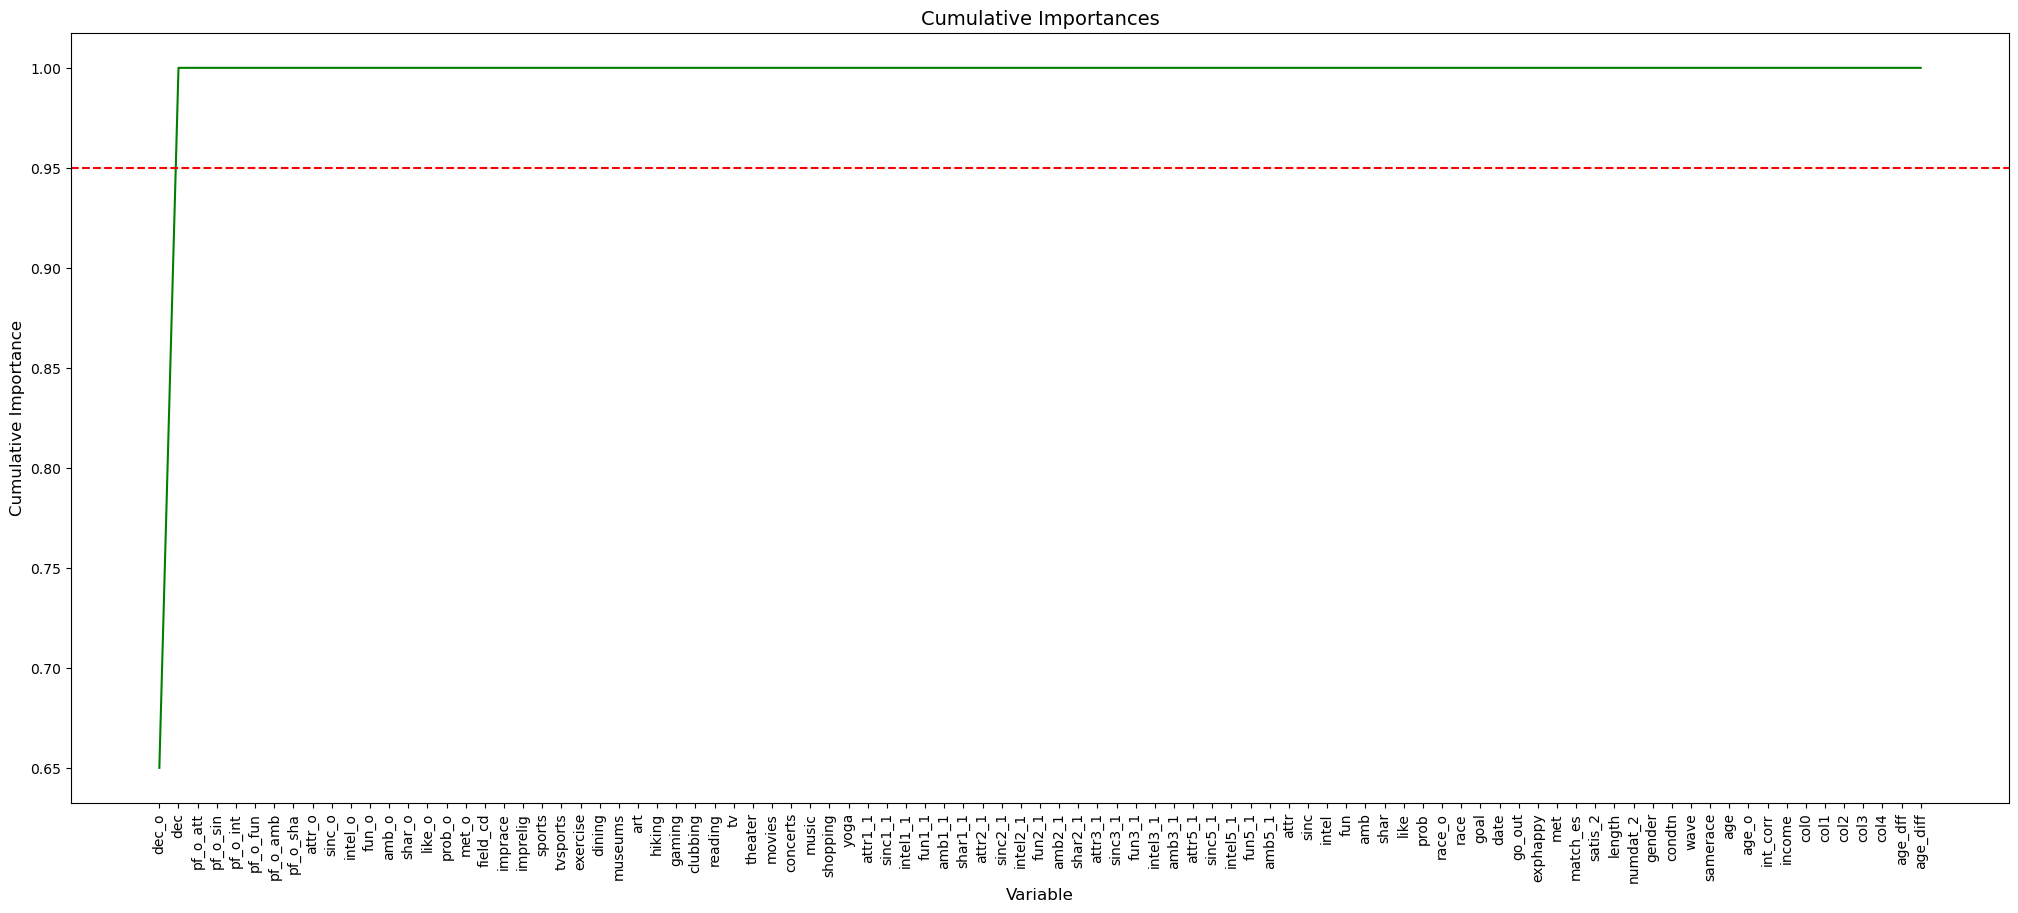

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Set the figure size and create the plot
fig, ax = plt.subplots(figsize=(25,10))
ax.plot(cumulative_importances, 'g-')

# Draw line at 95% of importance retained
ax.axhline(y=0.95, color='r', linestyle='--')

# Format x ticks and labels
ax.set_xticks(range(len(sorted_features)))
ax.set_xticklabels(sorted_features, rotation='vertical', fontsize=10)

# Axis labels and title
ax.set_xlabel('Variable', fontsize=12)
ax.set_ylabel('Cumulative Importance', fontsize=12)
ax.set_title('Cumulative Importances', fontsize=14)

# Show the plot
plt.show()


In [117]:
# New random forest with only the important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000,
random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('samerace'),
feature_list.index('dec_o')]
train_important = X_train_r[:, important_indices]
test_important = X_test[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, y_train_r)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round( np.mean(errors), 2))



Mean Absolute Error: 0.2


### Trying to plot a tree

In [118]:
#!pip install graphviz

In [119]:
from sklearn.tree import export_graphviz

# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
export_graphviz(tree, out_file='tree.dot', 
feature_names=feature_list)

In [120]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz

import pydot
rf_small = RandomForestRegressor(n_estimators=10, max_depth=3)
rf_small.fit(X_train_r, y_train_r)
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file='small_tree.dot',
feature_names=feature_list, rounded=True, precision=1)
(graph,) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

FileNotFoundError: [WinError 2] "dot" not found in path.

## 3.2 Neurol Networks